In [3]:
import torch
import torch.nn as nn
import os

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
from torchvision import transforms

In [2]:
from torch.utils.data import DataLoader

In [7]:
from preprocessing import GoogleStreetView

In [14]:
from residual_attention_network import ResidualAttentionModel_92

In [9]:
train_data = '/data/sascha/Simcenter/cleaned_images/train'
test_dir = '/data/sascha/Simcenter/cleaned_images/validate/'

In [12]:
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
#train_dataset = GoogleStreetView(os.path.join(train_dir, 'description_train.csv'), transform=transform)
test_dataset = GoogleStreetView(os.path.join(test_dir, 'description_test.csv')
                                , transform=transform)
#train_loader = DataLoader(train_dataset,  batch_size=8,
#                        shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset,  batch_size=8,
                        shuffle=True, num_workers=4)

In [15]:
model = ResidualAttentionModel_92()

In [157]:
model_file = './best_accuracy.pkl'

In [158]:
model.load_state_dict((torch.load(model_file)))

<All keys matched successfully>

In [194]:
model.eval()

ResidualAttentionModel_92(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (mpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (residual_block1): Residual_Block(
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (conv4): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=Fals

In [160]:
images, labels = next(iter(test_loader))

In [200]:
attention_layer = 'attention_module2'
first_layers = []
for name, module in model.named_children():
    if not attention_layer is name:
        first_layers.append(module)
    else:
        attention_layer = module
        break

In [202]:
first_layers = nn.Sequential(*first_layers)

In [206]:
output_before_attention = first_layers(images)

In [207]:
attention_output = attention_layer(output_before_attention)

In [208]:
attention_output.shape

torch.Size([8, 512, 28, 28])

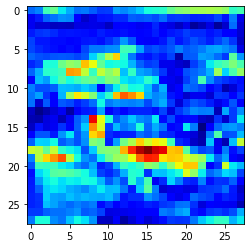

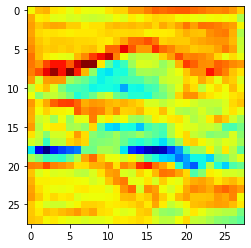

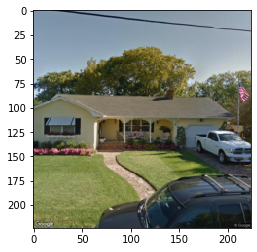

In [215]:
img_no = 4
plt.imshow(attention_output[img_no].max(0)[0].detach().numpy(),cmap='jet')
plt.show()
plt.imshow(attention_output[img_no].mean(0).detach().numpy(),cmap='jet')
plt.show()
plt.imshow(images[img_no].transpose(0,2).transpose(0,1))
plt.show()